In [1]:
import pandas as pd

In [30]:
dados = pd.read_csv("dados/util_data.csv")

In [31]:
#Define a capacidade de acordo com o tipo de instância
def define_capacidade(row):
    capacidade = 0
    if row['InstanceType'] == "t2.medium":
        capacidade = 2
    elif row['InstanceType'] == "t2.micro":
        capacidade = 1
    elif row['InstanceType'] == "c5.large":
        capacidade = 2
    elif row['InstanceType'] == "c5.xlarge":
        capacidade = 4
    elif row['InstanceType'] == "m5d.large":
        capacidade = 2
    elif row['InstanceType'] == "m5d.xlarge":
        capacidade = 4
    elif row['InstanceType'] == "r5.2xlarge":
        capacidade = 8
    elif row['InstanceType'] == "t3.micro":
        capacidade = 2
   
    return capacidade

In [32]:
dados['capacidade'] = dados.apply(define_capacidade, axis=1)

In [33]:
capacidade_extra = 0 
step_size = 2
limite_inferior = 39
limite_superior = 60

In [45]:
utilizacoes = []
adis =[]
capacidade_extra = 0 
step_size = 2
cap_extras = []

for index, row in dados.iterrows():
    capacidade = (row["capacidade"] + capacidade_extra)

    if capacidade < row["capacidade"]:
        capacidade = row["capacidade"]
        
    utilizacao = (row["Average"]/capacidade) * 100
    utilizacoes.append(utilizacao)
   
    if utilizacao > limite_superior: 
        adi = utilizacao - limite_superior
        adis.append(adi)
        cap_extras.append(capacidade_extra)

    elif utilizacao < limite_inferior:
        adi = limite_inferior - utilizacao
        capacidade_extra = step_size * (-1)
        adis.append(adi)
        cap_extras.append(capacidade_extra)
    
    else:
        adi = 0
        capacidade_extra = 0
        adis.append(adi)
        cap_extras.append(capacidade_extra)

    capacidade_extra = capacidade_extra

dados["utilizacao"] = utilizacoes
dados["adi_fixo"] = adis
dados["cap_extra"] = cap_extras

In [46]:
utilizacoes_adap = []
adis_adap =[]
capacidade_extra = 0 
cap_extras_adap = []

for index, row in dados.iterrows():
    capacidade = (row["capacidade"] + capacidade_extra)

    if capacidade < row["capacidade"]:
        capacidade = row["capacidade"]
        
    utilizacao = (row["Average"]/capacidade) * 100
    utilizacoes_adap.append(utilizacao)
    
    if utilizacao > limite_superior: 
        adi = utilizacao - limite_superior
        adis_adap.append(adi)
        cap_extra_adap = capacidade *(utilizacao - limite_superior)/limite_superior
        if cap_extra_adap == 0:
            capacidade_extra = 0
        elif cap_extra_adap > 0 and cap_extra_adap <=1:
            capacidade_extra = 1
        elif cap_extra_adap > 1 and cap_extra_adap <=2:
            capacidade_extra = 2
        elif cap_extra_adap > 2 and cap_extra_adap <=4:
            capacidade_extra = 4
        elif cap_extra_adap > 4:
            capacidade_extra = 8
        cap_extras_adap.append(capacidade_extra)

    elif utilizacao < limite_inferior:
        adi = limite_inferior - utilizacao
        capacidade_extra = step_size * (-1)
        adis_adap.append(adi)
        cap_extra_adap =  (capacidade * (limite_superior - utilizacao))/limite_superior
        if cap_extra_adap == 0:
            capacidade_extra = 0
        elif cap_extra_adap > 0 and cap_extra_adap <=1:
            capacidade_extra = 1
        elif cap_extra_adap > 1 and cap_extra_adap <=2:
            capacidade_extra = 2
        elif cap_extra_adap > 2 and cap_extra_adap <=4:
            capacidade_extra = 4
        elif cap_extra_adap > 4:
            capacidade_extra = 8
        cap_extras_adap.append(capacidade_extra)
    
    else:
        adi = 0
        capacidade_extra = 0
        adis_adap.append(adi)
        cap_extras_adap.append(capacidade_extra)

    capacidade_extra = capacidade_extra

dados["utilizacao_adap"] = utilizacoes_adap
dados["adi_adaptativo"] = adis_adap
dados["cap_extra_adap"] = cap_extras_adap

In [28]:
dados.to_csv("dados_adi_fixo_adap.csv")

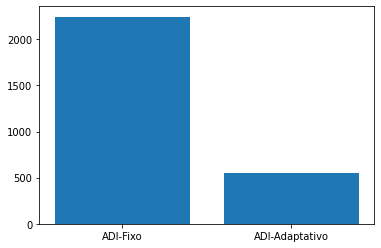

In [49]:
import matplotlib.pyplot as plt

plt.bar(["ADI-Fixo", "ADI-Adaptativo"], [sum(dados["adi_fixo"]/100),sum(dados["adi_adaptativo"]/100)])
plt.show()